In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# from gbdt import decisiontree, xgbdt

# Data Loading

Data Source: http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

In [2]:
features = ['sex', 'length', 'diameter', 'height', 'weight', \
            'shuck_weight', 'visc_weight', 'shell_weight']
labels = ['rings']
intsex = {'M':0, 'F':1, 'I':2}

In [3]:
data = pd.read_csv('data/abalone.data', names = features + labels)
data['sex'] = data['sex'].replace(intsex)
data.loc[(data['rings'] < 10), 'rings'] = 0
data.loc[(data['rings'] >= 10), 'rings'] = 1
data.tail()

,sex,length,diameter,height,weight,shuck_weight,visc_weight,shell_weight,rings
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1
4176,0,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,1


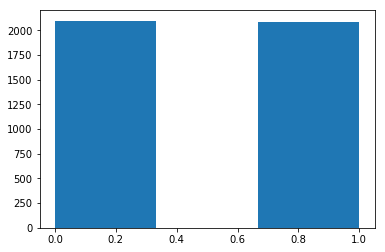

In [4]:
plt.hist(data['rings'], bins = 3)
pass;

In [5]:
for x in features:
    data.loc[:, x] *= np.divide(1, data[x].max())

data.head()

,sex,length,diameter,height,weight,shuck_weight,visc_weight,shell_weight,rings
0,0.0,0.558282,0.561538,0.084071,0.181915,0.150874,0.132895,0.149254,1
1,0.0,0.429448,0.407692,0.079646,0.079809,0.066868,0.063816,0.069652,0
2,0.5,0.650307,0.646154,0.119469,0.239604,0.172379,0.186184,0.208955,0
3,0.0,0.539877,0.561538,0.110619,0.182623,0.144825,0.150000,0.154229,1
4,1.0,0.404908,0.392308,0.070796,0.072554,0.060148,0.051974,0.054726,0


In [6]:
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
df_train, df_test = data.iloc[sample], data.drop(sample)

In [7]:
df_train.tail()
df_test.tail()

,sex,length,diameter,height,weight,shuck_weight,visc_weight,shell_weight,rings
702,0.5,0.546012,0.507692,0.092920,0.160149,0.120968,0.135526,0.122388,0
1429,1.0,0.171779,0.161538,0.030973,0.004955,0.003696,0.003289,0.003980,0
396,0.5,0.613497,0.607692,0.123894,0.253230,0.212702,0.231579,0.238806,1
4061,0.0,0.760736,0.715385,0.128319,0.322421,0.252016,0.282237,0.276617,1
1104,1.0,0.625767,0.623077,0.110619,0.240488,0.232863,0.183553,0.181095,0


,sex,length,diameter,height,weight,shuck_weight,visc_weight,shell_weight,rings
4144,0.0,0.822086,0.823077,0.168142,0.590692,0.501680,0.386184,0.505473,1
4151,1.0,0.429448,0.384615,0.066372,0.059989,0.056116,0.046711,0.040796,0
4155,1.0,0.539877,0.538462,0.097345,0.134666,0.105847,0.117763,0.114428,0
4156,0.0,0.582822,0.569231,0.097345,0.173244,0.146841,0.140789,0.145274,0
4158,1.0,0.588957,0.546154,0.097345,0.159087,0.135081,0.117105,0.139303,0


# Kakashi

In [24]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
from graphviz import dot

In [30]:
maxdepth = 3

class decisiontree(nx.DiGraph):
    def __init__(self):
        super(decisiontree, self).__init__()
        self.add_node('root', nodetype = 'fork', feature = None, splitval = None, weight = None)
        
    def _splitnode(self, node):
        if node is 'root':
            lname, rname = 'l', 'r'
        else:
            lname, rname = node + 'l', node + 'r'
        self.add_node(lname, nodetype = None, feature = None, splitval = None, weight = None)
        self.add_node(rname, nodetype = None, feature = None, splitval = None, weight = None)
        self.add_edge(node, lname)
        self.add_edge(node, rname)
        
    def listnodes(self):
        return self.nodes
        
    def build(self, node, depth):
        assert len(list(self.successors(node) ) ) == 0
        
        if depth > maxdepth:
            self.nodes[node]['nodetype'] = 'leaf'
            self.nodes[node]['weight'] = np.random.uniform(-1, 0)
            return
        else:
            cointoss = np.random.uniform(0, 1)

            if cointoss > 0.8:
                self.nodes[node]['nodetype'] = 'leaf'
                self.nodes[node]['weight'] = np.random.uniform(-1, 0)
            else:
                self.nodes[node]['nodetype'] = 'fork'
                self.nodes[node]['splitval'] = np.random.uniform(0, 1)
                self.nodes[node]['feature'] = np.random.randint(0,8)
                self._splitnode(node)
                self.build(list(self.successors(node) )[0], depth = depth + 1)
                self.build(list(self.successors(node) )[1], depth = depth + 1 )
            
    def run(self, x, node):
        if self.nodes[node]['nodetype'] is 'leaf':
            return self.nodes[node]['weight']
        else:
            if x[self.nodes[node]['feature']] <= self.nodes[node]['splitval']:
                return self.run(x, list(self.successors(node) )[0])
            else:
                return self.run(x, list(self.successors(node) )[1])
    


In [ ]:
np.random.seed(1234)

In [31]:
train_data.X[0]

array([1.        , 0.32515337, 0.31538462, 0.0619469 , 0.03733852,
       0.02620968, 0.05394737, 0.03482587])

In [32]:
tree = decisiontree()

In [33]:
tree.build('root', depth = 0)

Text(0.5, 1.0, 'draw_networkx')

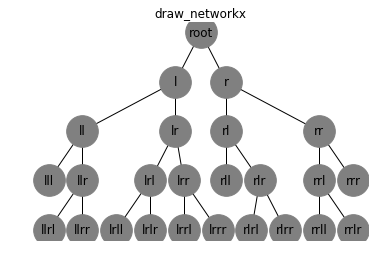

In [34]:
plt.title('draw_networkx')
pos=graphviz_layout(tree, prog='dot')
nx.draw(tree, pos, with_labels=True, arrows=False, node_size=1000, node_color='gray')

In [44]:
tree.run(train_data.X[6], 'root')

-0.5197923420201332

In [41]:
nx.get_node_attributes(tree, 'weight')
nx.get_node_attributes(tree, 'feature')

{'root': None,
 'l': None,
 'r': None,
 'll': None,
 'lr': None,
 'lll': -0.5197923420201332,
 'llr': None,
 'llrl': -0.48684159206800115,
 'llrr': -0.34768597270842483,
 'lrl': None,
 'lrr': None,
 'lrll': -0.36993487010443504,
 'lrlr': -0.5330485938131926,
 'lrrl': -0.49917962689343864,
 'lrrr': -0.7915872422976127,
 'rl': None,
 'rr': None,
 'rll': -0.7559342314223427,
 'rlr': None,
 'rlrl': -0.8775207038834926,
 'rlrr': -0.7914036114409989,
 'rrl': None,
 'rrr': -0.14772765268350807,
 'rrll': -0.04877141031254573,
 'rrlr': -0.26715117091738516}

{'root': 4,
 'l': 0,
 'r': 6,
 'll': 7,
 'lr': 4,
 'lll': None,
 'llr': 7,
 'llrl': None,
 'llrr': None,
 'lrl': 1,
 'lrr': 5,
 'lrll': None,
 'lrlr': None,
 'lrrl': None,
 'lrrr': None,
 'rl': 7,
 'rr': 4,
 'rll': None,
 'rlr': 1,
 'rlrl': None,
 'rlrr': None,
 'rrl': 0,
 'rrr': None,
 'rrll': None,
 'rrlr': None}

In [118]:
tree.successors('l')

In [115]:
tree.nodes['root']['splitval'] = 5.0

In [116]:
nx.get_node_attributes(tree, 'splitval')

{'root': 5.0, 'l': None, 'r': None, 'll': None, 'lr': None}

In [106]:
tree.__dict__

{'node_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {},
 '_node': {'root': {'nodetype': 'node',
   'feature': None,
   'splitval': 5.0,
   'weight': None},
  'l': {'nodetype': None, 'feature': None, 'splitval': 5.0, 'weight': None},
  'r': {'nodetype': None, 'feature': None, 'splitval': 5.0, 'weight': None},
  'll': {'nodetype': None, 'feature': None, 'splitval': 5.0, 'weight': None},
  'lr': {'nodetype': None, 'feature': None, 'splitval': 5.0, 'weight': None}},
 '_adj': {'root': {'l': {}, 'r': {}},
  'l': {'ll': {}, 'lr': {}},
  'r': {},
  'll': {},
  'lr': {}},
 '_pred': {'root': {},
  'l': {'root': {}},
  'r': {'root': {}},
  'll': {'l': {}},
  'lr': {'l': {}}},
 '_succ': {'root': {'l': {}, 'r': {}},
  'l': {'ll': {}, 'lr': {}},
  'r': {},
  'll': {},
  'lr': {}},
 'nodes': NodeView(('root', 'l', 'r', 'll', 'lr'))}

Text(0.5, 1.0, 'draw_networkx')

/home/q1park/anaconda3/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


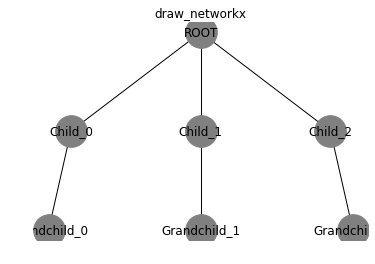

In [17]:
G = nx.DiGraph()

G.add_node("ROOT")

for i in range(3):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    
plt.title('draw_networkx')
pos=graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=False, node_size=1000, node_color='gray')

In [18]:
G.__dict__

{'node_dict_factory': dict,
 'adjlist_outer_dict_factory': dict,
 'adjlist_inner_dict_factory': dict,
 'edge_attr_dict_factory': dict,
 'graph': {},
 '_node': {'ROOT': {},
  'Child_0': {},
  'Grandchild_0': {},
  'Child_1': {},
  'Grandchild_1': {},
  'Child_2': {},
  'Grandchild_2': {}},
 '_adj': {'ROOT': {'Child_0': {}, 'Child_1': {}, 'Child_2': {}},
  'Child_0': {'Grandchild_0': {}},
  'Grandchild_0': {},
  'Child_1': {'Grandchild_1': {}},
  'Grandchild_1': {},
  'Child_2': {'Grandchild_2': {}},
  'Grandchild_2': {}},
 '_pred': {'ROOT': {},
  'Child_0': {'ROOT': {}},
  'Grandchild_0': {'Child_0': {}},
  'Child_1': {'ROOT': {}},
  'Grandchild_1': {'Child_1': {}},
  'Child_2': {'ROOT': {}},
  'Grandchild_2': {'Child_2': {}}},
 '_succ': {'ROOT': {'Child_0': {}, 'Child_1': {}, 'Child_2': {}},
  'Child_0': {'Grandchild_0': {}},
  'Grandchild_0': {},
  'Child_1': {'Grandchild_1': {}},
  'Grandchild_1': {},
  'Child_2': {'Grandchild_2': {}},
  'Grandchild_2': {}},
 'nodes': NodeView(('ROOT